In [ ]:
from util.plot_layer_development import plot_layer_development
from glob import glob
import copy
from constants import NUMBER_INPUT_NEURONS, NUMBER_OUTPUT_NEURONS, TIME_STEPS
from neural_nets.configurable_spiking_neural_net import ConfigurableSpikingNeuralNet
import torch

NUMBER_HIDDEN_NEURONS = 3000
NUMBER_HIDDEN_LAYER = 2
beta = 0.8
threshold = 1

base_net =  ConfigurableSpikingNeuralNet(number_input_neurons=NUMBER_INPUT_NEURONS,
                                                    number_hidden_neurons=NUMBER_HIDDEN_NEURONS,
                                                    number_output_neurons=NUMBER_OUTPUT_NEURONS,
                                                    beta=beta,
                                                    threshold=threshold,
                                                    time_steps=TIME_STEPS,
                                                    number_hidden_layers=NUMBER_HIDDEN_LAYER)

all_point_of_chaos_models = glob('./models/experiment_point_of_chaos/best_grid_search*.pth')

results = []

In [ ]:
all_point_of_chaos_models = [(int(model_path.split("epoch_")[1].replace('.pth', '')), model_path) for model_path in all_point_of_chaos_models]

all_point_of_chaos_models

In [17]:
import numpy as np

interesting_models = [0, 10, 20, 30, 40, 50, 60, 70, 80]

interesting_point_of_chaos_models = np.array(sorted(all_point_of_chaos_models, key=lambda key: key[0]))[interesting_models]

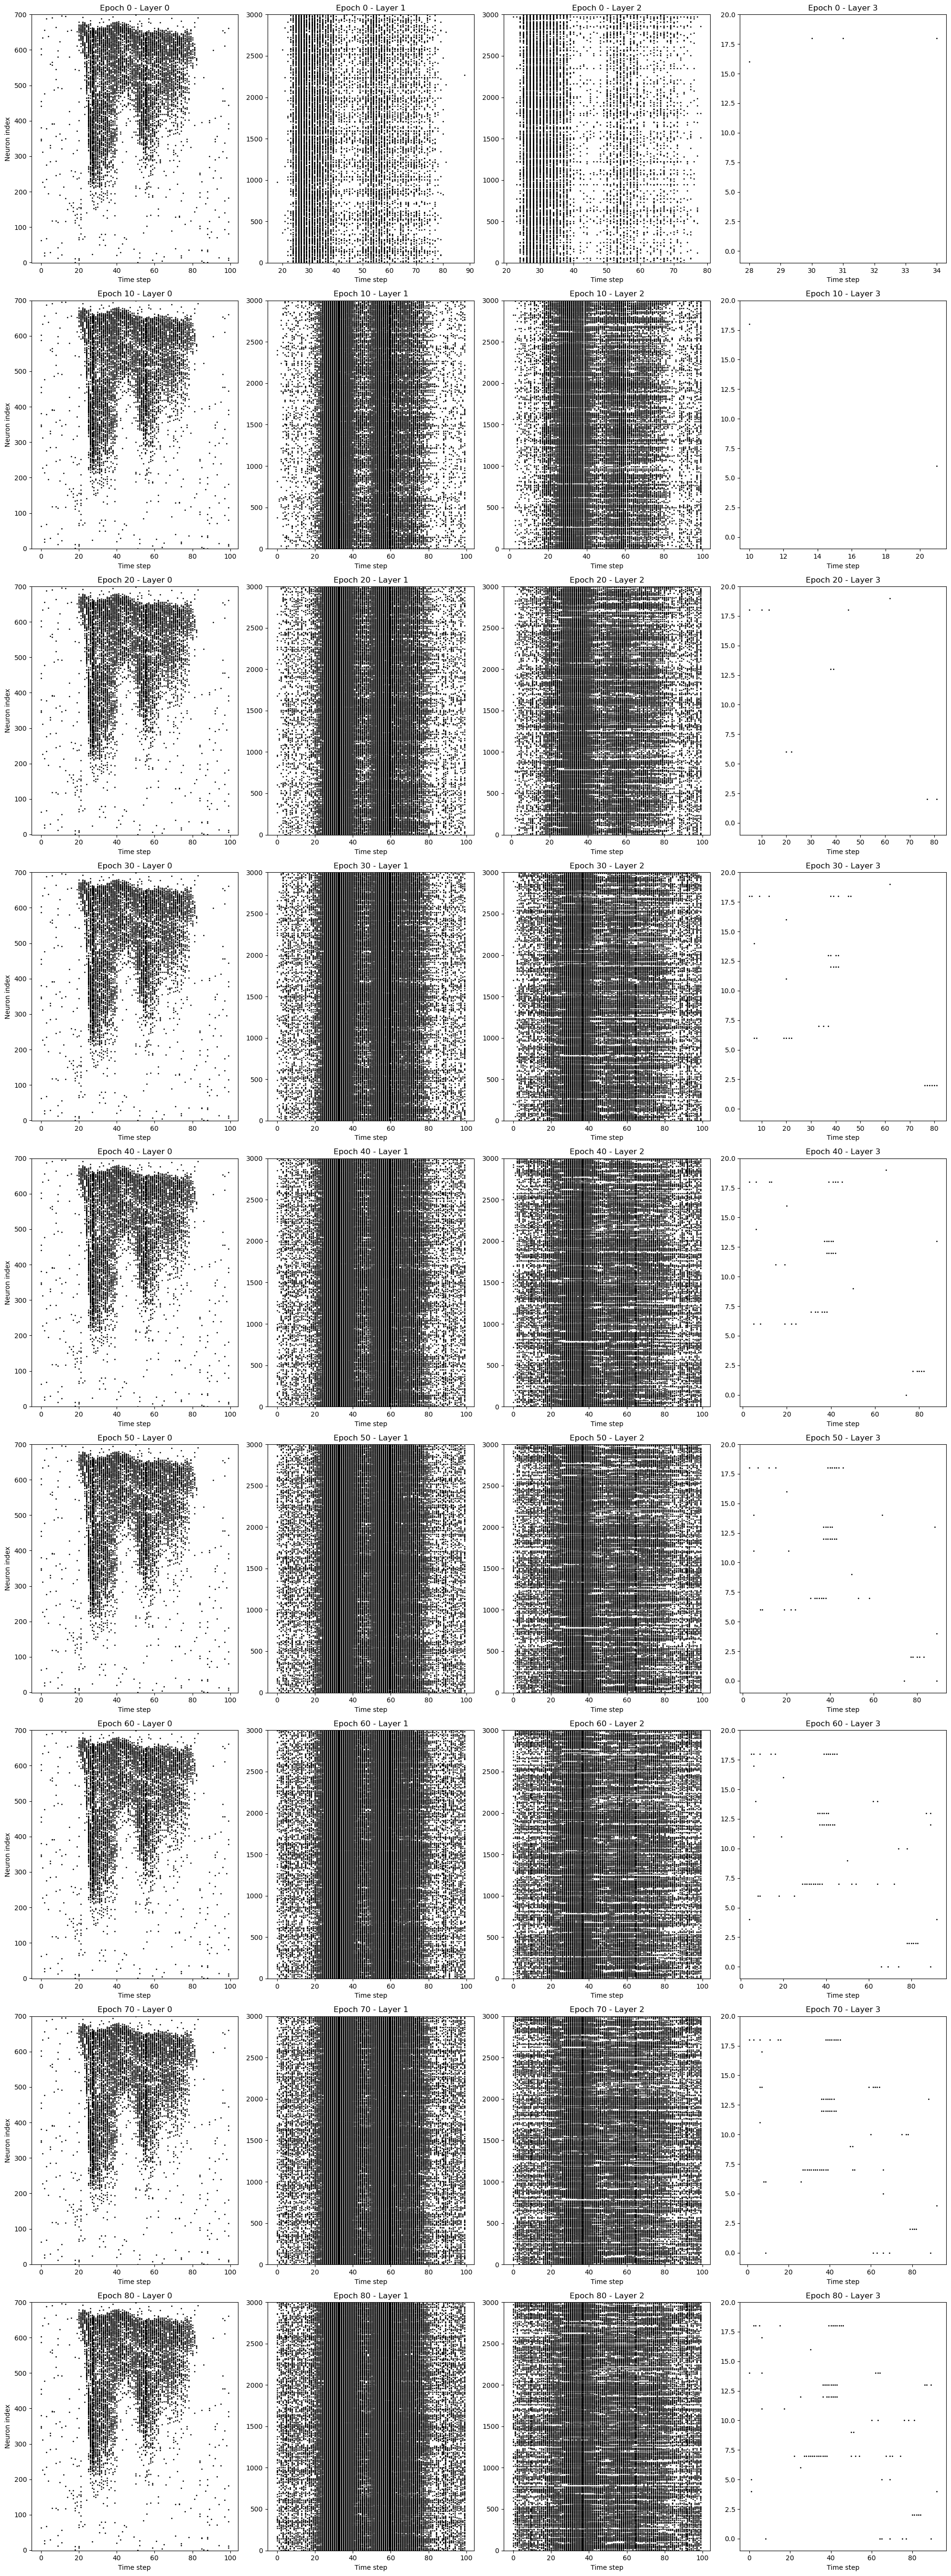

In [20]:
results = []

for epoch, model_path in interesting_point_of_chaos_models:
    model = copy.deepcopy(base_net)
    model.load_state_dict(torch.load(model_path))
    results.append([epoch, model])

results = sorted(results, key=lambda key: key[0])

epochs = [value[0] for value in results]
models = [value[1] for value in results]

plot_layer_development(models, [f'Epoch {epoch}' for epoch in epochs])

# Point of chaos without overfitting?
- training different network combinations for only 5 epochs => comparing them what parameter configurations make it denser => does this denseness improve the test accuracy
- can we turn these parameter combinations so to make it even more dense => lower beta value?

In [ ]:
from constants import NUMBER_INPUT_NEURONS, NUMBER_OUTPUT_NEURONS, TIME_STEPS
from neural_nets.configurable_spiking_neural_net import ConfigurableSpikingNeuralNet
from training.train_snn import train_snn

NUMBER_HIDDEN_NEURONS = 100
NUMBER_HIDDEN_LAYER = 1

BETAS = [0.6, 0.7, 0.8, 0.9, 0.99]

threshold = 1

for beta in BETAS:
    base_net =  ConfigurableSpikingNeuralNet(number_input_neurons=NUMBER_INPUT_NEURONS,
                                                        number_hidden_neurons=NUMBER_HIDDEN_NEURONS,
                                                        number_output_neurons=NUMBER_OUTPUT_NEURONS,
                                                        beta=beta,
                                                        threshold=threshold,
                                                        time_steps=TIME_STEPS,
                                                        number_hidden_layers=NUMBER_HIDDEN_LAYER)
    sparsity = 0

    train_snn(base_net, 
                num_epochs=3, 
                sparsity=sparsity,
                save_model=f'./models/experiment_point_of_chaos/3_epochs_beta_{beta}_threshold_1',
                additional_output_information={'sparsity': sparsity, 'number_hidden_neurons': NUMBER_HIDDEN_NEURONS, 'number_hidden_layer': NUMBER_HIDDEN_LAYER, 'beta': beta, 'threshold': threshold}, 
                output_file_path=f'./output/experiments_point_of_chaos/3_epochs_beta_{beta}_threshold_1.json')

In [ ]:
from util.plot_layer_development import plot_layer_development
from glob import glob
import copy
from constants import NUMBER_INPUT_NEURONS, NUMBER_OUTPUT_NEURONS, TIME_STEPS
from neural_nets.configurable_spiking_neural_net import ConfigurableSpikingNeuralNet
import torch

NUMBER_HIDDEN_NEURONS = 100
NUMBER_HIDDEN_LAYER = 1
BETAS = [0.6, 0.8, 0.99]
threshold = 1

models = []

for beta in BETAS:
    base_net =  ConfigurableSpikingNeuralNet(number_input_neurons=NUMBER_INPUT_NEURONS,
                                                        number_hidden_neurons=NUMBER_HIDDEN_NEURONS,
                                                        number_output_neurons=NUMBER_OUTPUT_NEURONS,
                                                        beta=beta,
                                                        threshold=threshold,
                                                        time_steps=TIME_STEPS,
                                                        number_hidden_layers=NUMBER_HIDDEN_LAYER)
    
    model_path = f'./models/experiment_point_of_chaos/3_epochs_beta_{beta}_threshold_1.pth'

    model = copy.deepcopy(base_net)
    model.load_state_dict(torch.load(model_path))
    models.append(model)

plot_layer_development(models, [f'Beta: {beta}' for beta in BETAS])

# Denseness corresponds to higher training epochs

In [21]:
def build_model_path(sparsity, beta, threshold):
    sparsity = '0' if sparsity == 0 else sparsity
    threshold = '1' if threshold == 1 else threshold
    return f'./models/experiment_layer_development_investigation/best_grid_search_sparsity_{sparsity}_beta_{beta}_threshold_{threshold}.pth'


In [22]:
from glob import glob
import json
import pandas as pd

files = glob('./output/experiments_layer_development_investigation/*.json')

all_dicts = []

for file in files:
    with open(file, "r") as f:
        data = json.load(f)
        all_dicts.append(data)

sparsity_evaluation = pd.DataFrame(all_dicts)

sparsity_evaluation["average_training_time_per_epoch"] = sparsity_evaluation["time"] / sparsity_evaluation["epochs"]

sparsity_evaluation = sparsity_evaluation[(sparsity_evaluation["beta"] >= 0.8) & (sparsity_evaluation["threshold"] <= 1) ]

sparsity_evaluation = (sparsity_evaluation.sort_values("epochs", ascending=False))[["epochs", "test_accuracy", "sparsity", "beta", "threshold", "average_training_time_per_epoch"]]

sparsity_evaluation

,epochs,test_accuracy,sparsity,beta,threshold,average_training_time_per_epoch
10,56,61.307420,0.95,0.80,1.0,710.448288
21,54,64.045936,0.95,0.80,0.7,719.683757
14,36,65.106007,0.70,0.80,1.0,728.505273
19,24,67.314488,0.20,0.80,1.0,742.817294
20,22,71.952297,0.20,0.80,0.7,728.018830
7,18,63.825088,0.70,0.80,0.7,872.824339
5,15,70.892226,0.00,0.80,1.0,413.702296
8,14,71.643110,0.00,0.80,0.7,455.781714
15,14,59.363958,0.70,0.99,0.7,738.234035
3,12,64.796820,0.00,0.99,0.7,431.855382


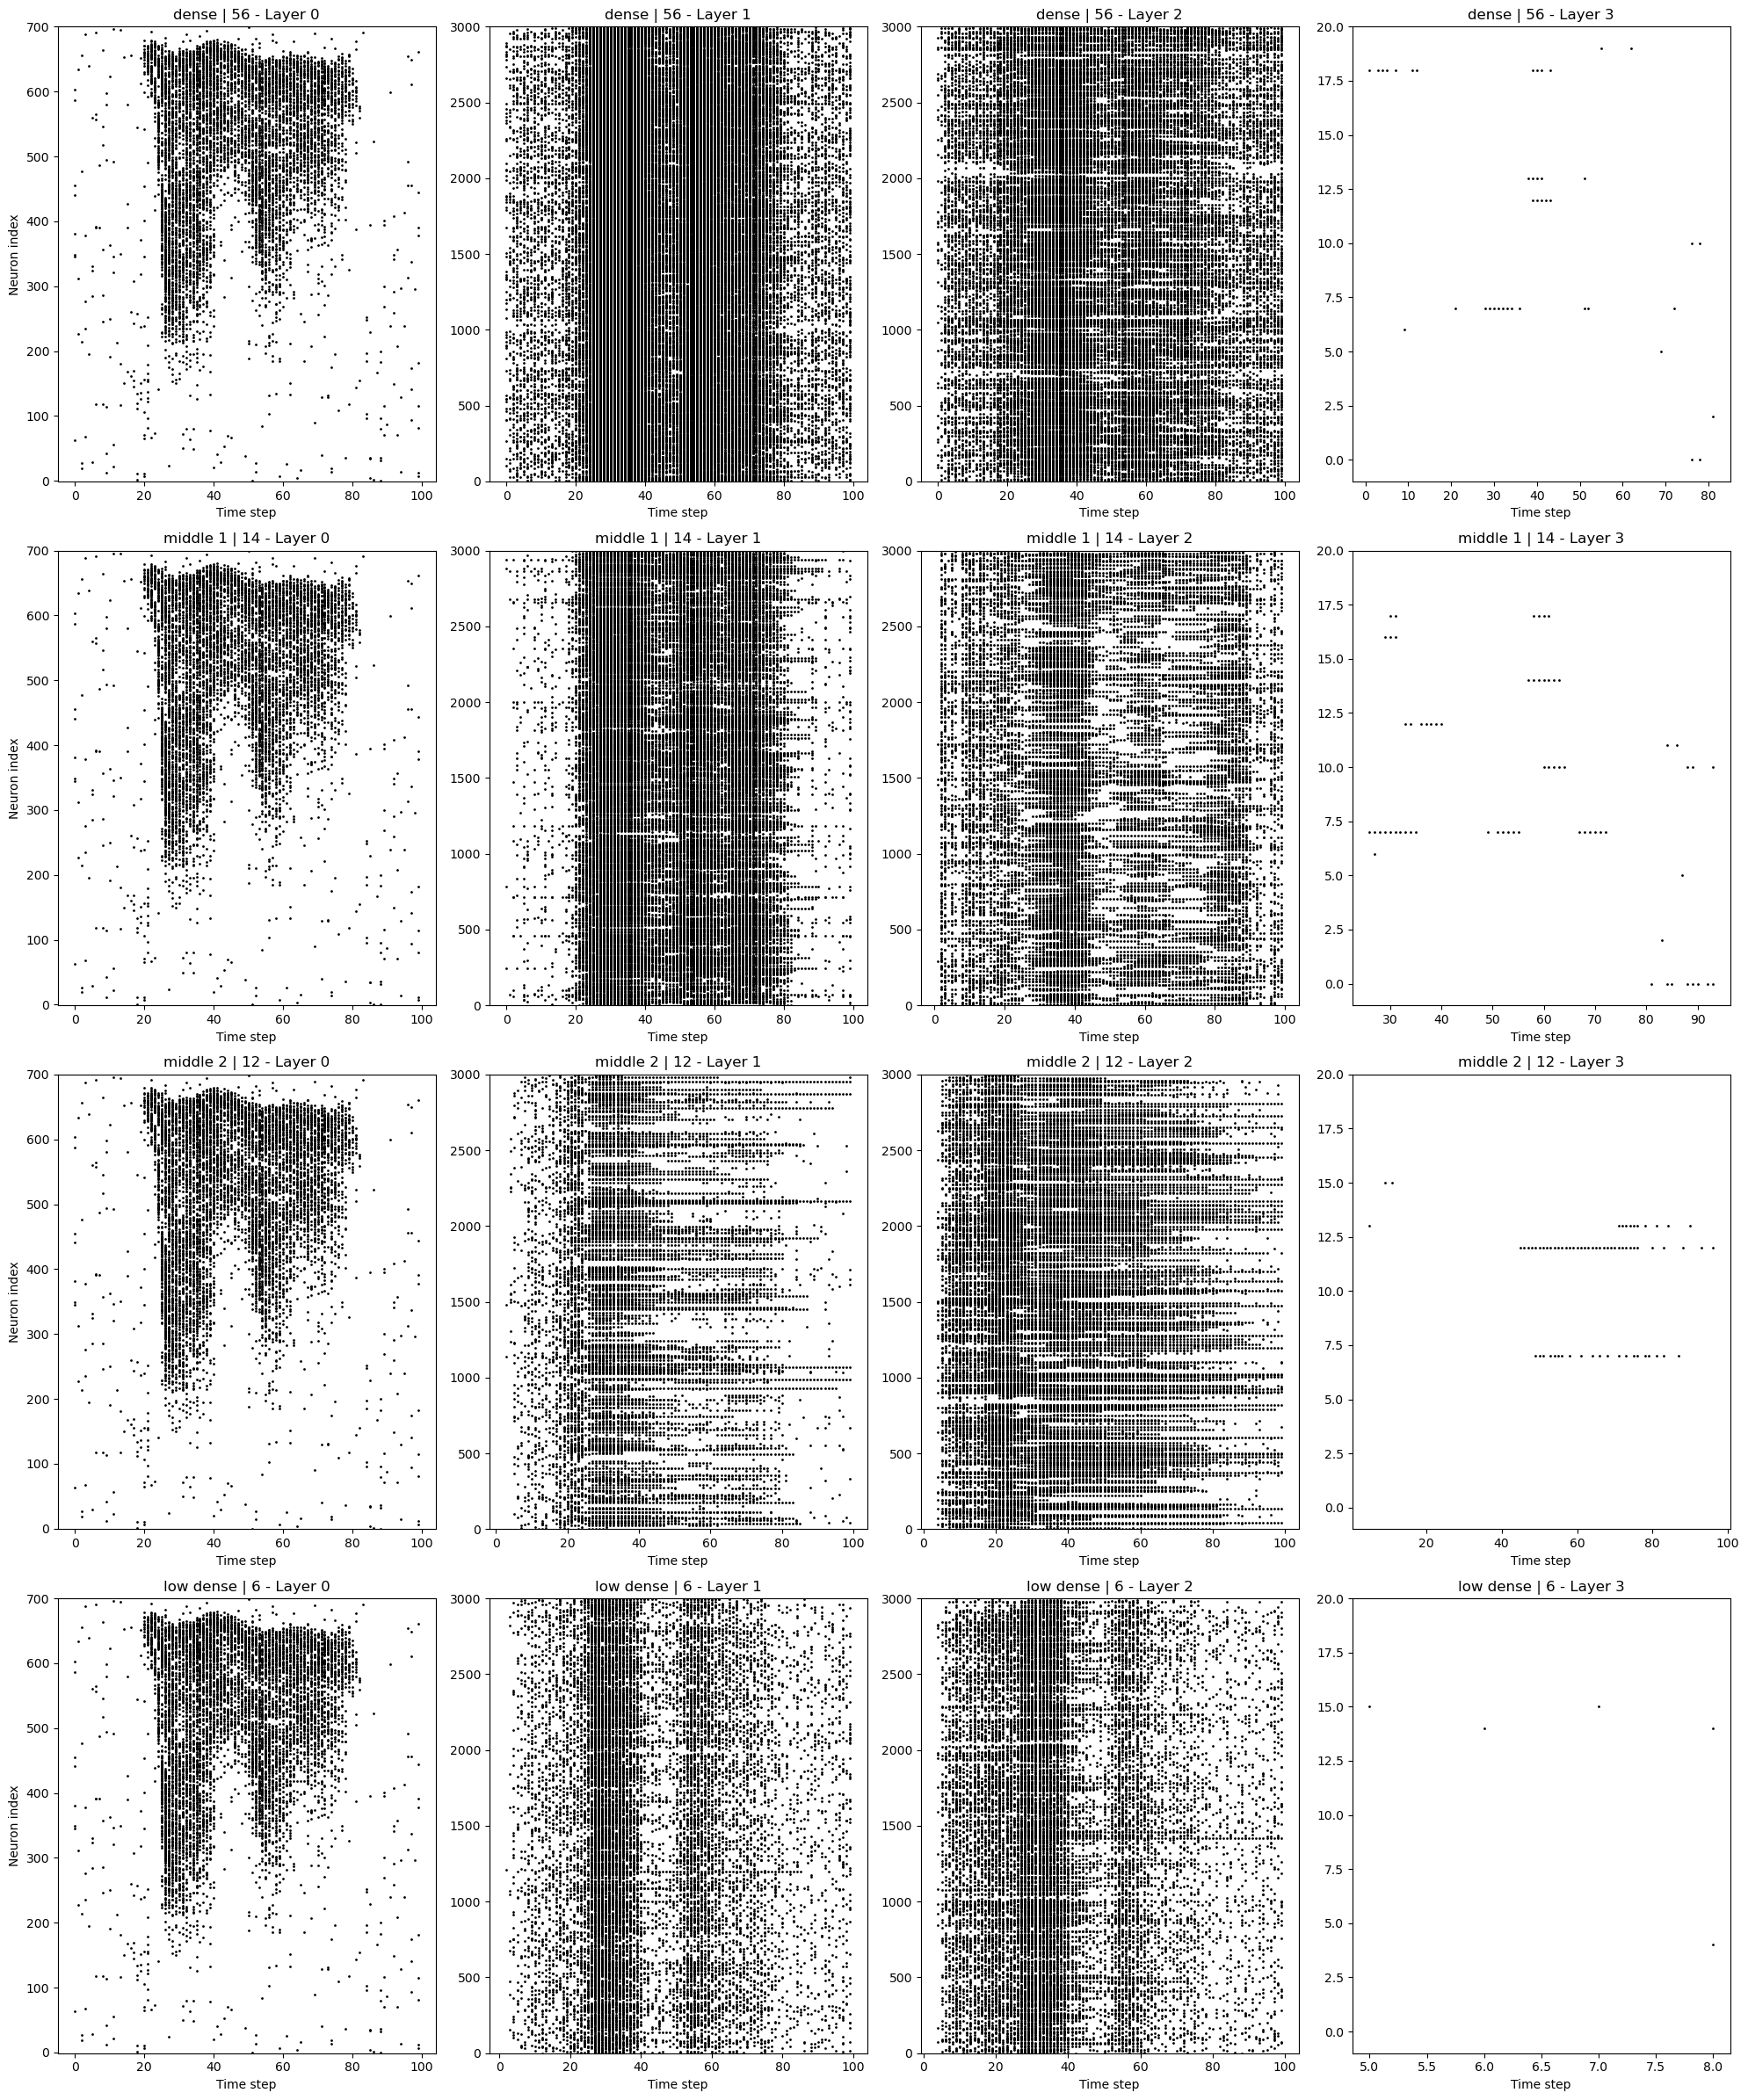

In [23]:
from util.plot_layer_development import plot_layer_development
from neural_nets.configurable_spiking_neural_net import ConfigurableSpikingNeuralNet
from constants import NUMBER_INPUT_NEURONS, NUMBER_OUTPUT_NEURONS, TIME_STEPS
import copy
import torch

configurations = [
    {
        'name': 'dense',
        'sparsity': 0.95,
        'beta': 0.8,
        'threshold': 1,
        'epochs': 56
    },
    {
        'name': 'middle 1',
        'sparsity': 0,
        'beta': 0.8,
        'threshold': 1,
        'epochs': 14
    },
    {
        'name': 'middle 2',
        'sparsity': 0,
        'beta': 0.99,
        'threshold': 1,
        'epochs': 12
    },
    {
        'name': 'low dense',
        'sparsity': 0.95,
        'beta': 0.99,
        'threshold': 0.7,
        'epochs': 6
    }
]

models = []
names = []

for config in configurations:

    base_net = ConfigurableSpikingNeuralNet(number_input_neurons=NUMBER_INPUT_NEURONS, 
                                                number_output_neurons=NUMBER_OUTPUT_NEURONS, 
                                                number_hidden_layers=2,
                                                number_hidden_neurons=3000,
                                                beta=config["beta"], 
                                                threshold=config["threshold"],
                                                time_steps=TIME_STEPS)

    model = copy.deepcopy(base_net)
    model.load_state_dict(torch.load(build_model_path(sparsity=config["sparsity"], beta=config["beta"], threshold=config["threshold"])))

    models.append(model)
    names.append(f'{config["name"]} | {config["epochs"]}')

plot_layer_development(models, names)
